In [3]:
from labtools import plot_style
from matplotlib import pyplot as plt
import numpy as np
import os

In [34]:
func = lambda x, fr, tt=2: np.exp(-x**2/tt)*np.sin(2*np.pi * fr* x)

## Make a wave

In [17]:
t = np.linspace(-5, 5, 1000)

In [24]:
folder = 'pics'
try:
    os.mkdir(f"{folder}")
    folder = "pics"
except:
    print("Folder exist")

Folder exist


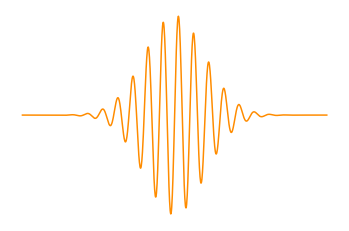

In [58]:
plt.plot(t, func(t, 2), color='darkorange')
plt.axis('off')
plt.savefig(f'{folder}/wave_1fr.pdf', transparent=True)

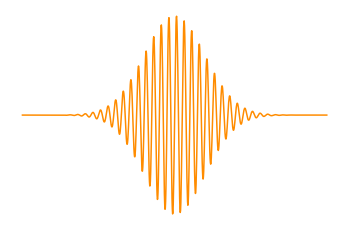

In [133]:
t = np.linspace(-5, 5, 1000)
plt.plot(t, func(t, 4), color='darkorange')
plt.axis('off')
plt.savefig(f'{folder}/wave_4fr.pdf', transparent=True)

In [130]:
func_multiMode = lambda x, fr, tt=2: np.concatenate(((np.exp(-(x[x<0] + 1)**2/2))*np.sin(2*np.pi * fr* x[x<0]), 
(np.exp(-(x[x>=0] - 1)**2/2))*np.sin(2*np.pi *fr*x[x>=0])))

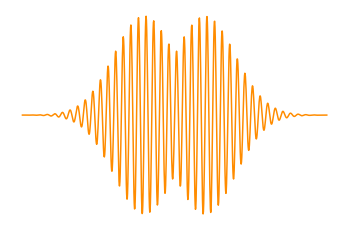

In [132]:
t = np.linspace(-5, 5, 1000)
plt.plot(t, func_multiMode(t, 4), color='darkorange')
plt.axis('off')
plt.savefig(f'{folder}/wave_multimode.pdf', transparent=True)

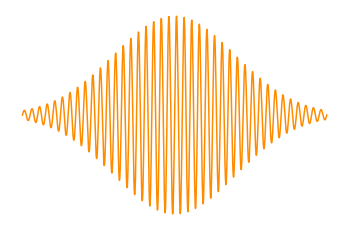

In [54]:
t = np.linspace(-5, 5, 1000)
plt.plot(t, func(t, 4, 8), color='darkorange')
plt.axis('off')
plt.savefig(f'{folder}/wave_4fr_tt10.pdf', transparent=True)

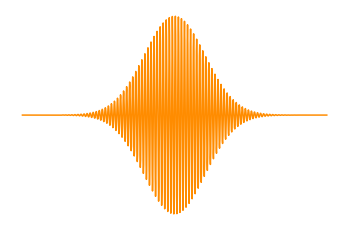

In [55]:
plt.plot(t, func(t, 10), color='darkorange')
plt.axis('off')
plt.savefig(f'{folder}/wave_10fr.pdf', transparent=True)

In [205]:
0.96 * 1/10e-9

96000000.0

In [267]:
M = np.linspace(0, 100, 100)
molecule = {"Pc":0.9,
           "T1": 10e-9,
           "R": 50e6,
           "I": 0.97}
molecule_best = {"Pc":0.9,
           "T1": 10e-9,
           "R": 30e6,
           "I": 0.97}
qdot = {"Pc":0.5,
           "T1": 10e-10,
           "R": 0.5 * 1/10e-10,
           "I": 0.95}
mux = {"Pc": 1,
           "T1": 1,
           "R": 5 * 1e6,
           "I": 0.99}
mux_0 = {"Pc":0.75,
           "T1": 1,
           "R": 5 * 1e5,
           "I": 0.9}

In [268]:
cm_molecule = np.array([molecule['R']*(molecule["Pc"]*molecule['I'])**m for m in M])
cm_molecule_best = np.array([molecule_best['R']*(molecule_best["Pc"]*molecule_best['I'])**m for m in M])
cm_qdot = np.array([qdot['R']*(qdot["Pc"]*qdot['I'])**m for m in M])
cm_mux = np.array([mux['R']*(mux["Pc"]*mux['I'])**m for m in M])
cm_mux_0 = np.array([mux_0['R']*(mux_0["Pc"]*mux_0['I'])**m for m in M])

(1, 1000000.0)

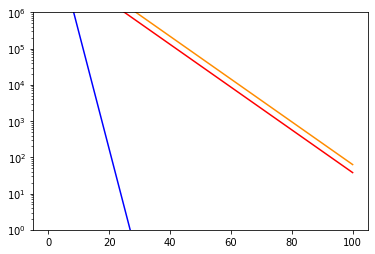

In [269]:
plt.plot(M, cm_molecule, '-', color='darkorange')
plt.plot(M, cm_molecule_best, '-', color='red')
plt.plot(M, cm_qdot, '-', color = 'blue')
plt.plot(M, cm_mux, '-', color = 'k')
plt.yscale('log')
plt.ylim((1, 1e6))
# plt.axis('off')

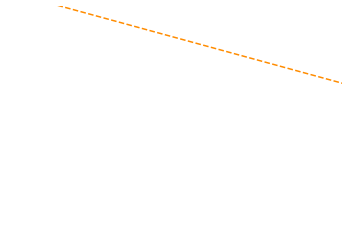

In [272]:
plt.plot(M, cm_molecule_best, '--', color='darkorange')
# plt.plot(M, cm_molecule, '--', color='blue')
# plt.plot(M, cm_mux_0, '-', color = 'b')
plt.yscale('log')
plt.ylim((1, 1e7))
plt.xlim((0, 50))
plt.axis('off')
plt.savefig(f'{folder}/versusMUX.pdf', transparent=True)

## Grpaphs from Matematica

In [5]:
wolfram_folder = "/Users/vladislavbushmakin"

In [6]:
os.chdir(wolfram_folder)

In [9]:
list(filter(lambda x: 'csv' in x, os.listdir()))

['NAsRF.csv',
 'longshort_fiber_lower01.csv',
 'pulse_filter_suppresed_raman.csv',
 'raman_long_fiber_tail.csv',
 'NAsBF.csv',
 'NAsSIL.csv',
 'longshort_fiber_upper01.csv',
 'pulse_fiher_raman.csv',
 'bad_fiber.csv',
 'weekly_coupled_fluorecent_sh.csv',
 'pulse_filter_suppresed_raman_nomolec.csv',
 'fiber_fiber_1.csv']

In [139]:
PARAMS = {
    "title_font_size": 25,
    "grid_linewidth": 1,
    "grid_color":"orange",
    "grid_linestyle": "--",
    "ticks_lenght": 4,
    "ticks_lenght_minor": 2.5,
    "ticks_width": 2,
    "grid_alpha": 0.4,
    "labels_font_size": 35,
    "saveDir": ".",
    "fontsize":35,
    "fontStyle":'Helvetica',
    "plot_name":'default_name'
}

In [140]:
p = plot_style.plotting(PARAMS)
p.saveDir = "/Users/vladislavbushmakin/Desktop/presa_graphs"

In [141]:
fit_ = np.polyfit(NAsRF[:,1], NAsRF[:,0], deg=4)
pol = np.polynomial.polynomial.Polynomial(fit_)

In [142]:
x = np.linspace(0, 1, 100)

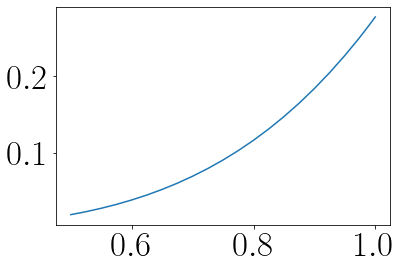

In [143]:
plt.plot(NAsRF[:,0], pol(NAsRF[:,0]))

In [144]:
NAsRFmore = np.genfromtxt('NAsRFmore.csv', delimiter=',')
NAsRF = np.genfromtxt('NAsRF.csv', delimiter=',')

In [145]:
NAsRF = np.vstack((NAsRF, NAsRFmore))

In [146]:
a = NAsRF[np.argsort(NAsRF[:, 0])]
a = a[np.isin(a[:,0], np.unique(NAsRF[:,0]))]

In [147]:
NAsRF = np.unique(a, axis=0)

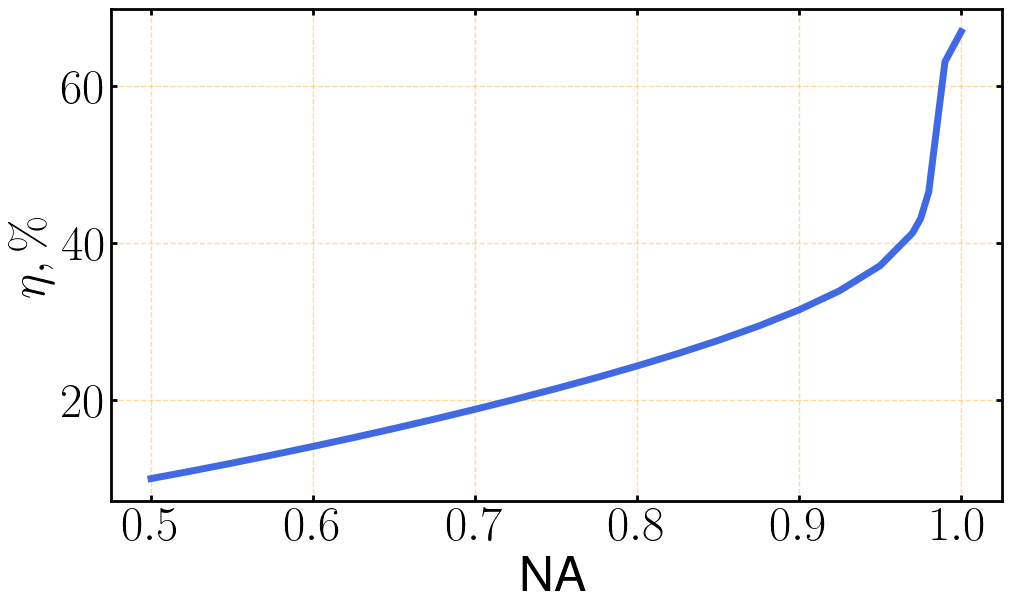

In [156]:
p.plot(NAsRF[:,0][0], NAsRF[:,1][0], line='-', yLabel = r'$\eta, \%$', xLabel = 'NA')
plt.plot(NAsRF[:,0], NAsRF[:,1], linewidth=5, color='royalblue')
p.save("NAsRF")

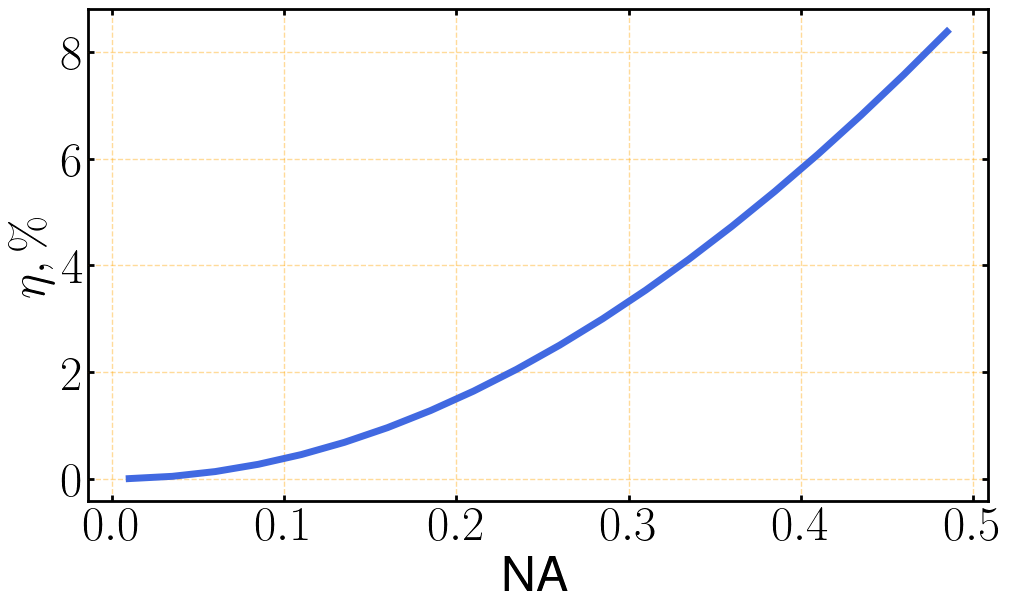

In [157]:
NAsBF = np.genfromtxt('NAsBF.csv', delimiter=',')

p.plot(NAsBF[:,0][0], NAsBF[:,1][0], line='-', yLabel = r'$\eta, \%$', xLabel = 'NA')
plt.plot(NAsBF[:,0], NAsBF[:,1], linewidth=5, color='royalblue')
p.save("NAsBF")

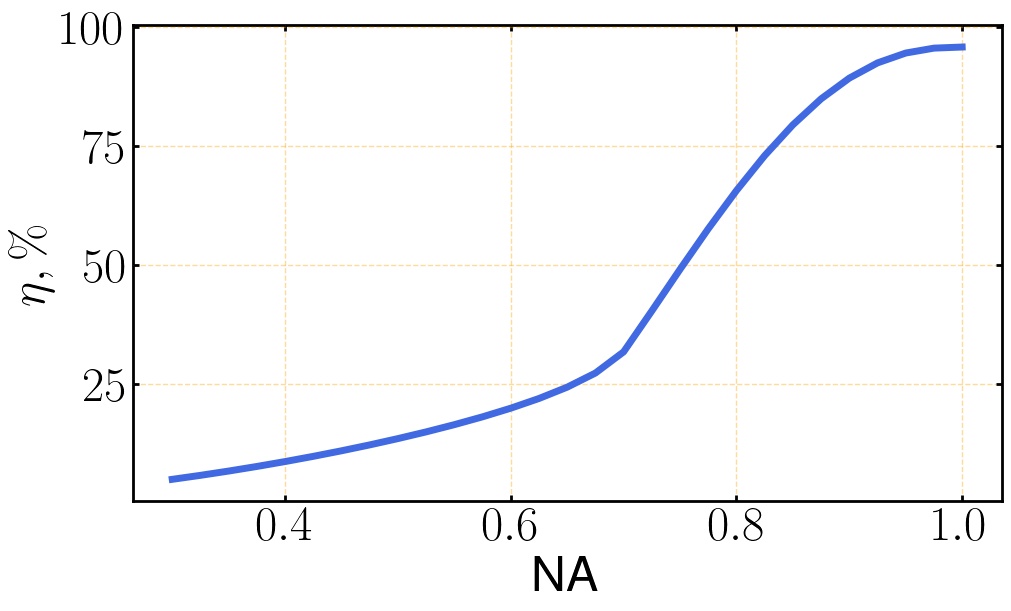

In [158]:
NAsSIL = np.genfromtxt('NAsSIL.csv', delimiter=',')

p.plot(NAsSIL[:,0][0], NAsSIL[:,1][0], line='-', yLabel = r'$\eta, \%$', xLabel = 'NA')
plt.plot(NAsSIL[:,0], NAsSIL[:,1], linewidth=5, color='royalblue')
p.save("NAsSIL")

In [1]:
from labtools import assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
os.listdir(f"{LOC['data']}")

['molec_jessy_low_power_190deg_0.dump',
 'test_cross_pol-20200430T101939Z-001.zip',
 '.DS_Store',
 'test_cross_pol 2',
 'scans',
 'test_cross_pol',
 'Splitting',
 'Fiber',
 'fiber_gauss_1.dump',
 'molec_jessy_low_power_190deg_0.dump_imgs',
 'Ramsey',
 'pi_pulse_1.dump',
 'fiber_gauss_0.dump']

In [9]:
dump_name="molec_jessy_low_power_190deg_0.dump"
dump = f"{LOC['data']}/{dump_name}"
data = np.array(get_dump(dump))

In [14]:
corr, _ = correlation(data,
    corr_window=300000,
    start_chs=[1,2],
    stop_chs=[3,4],
    trig_ch=5)

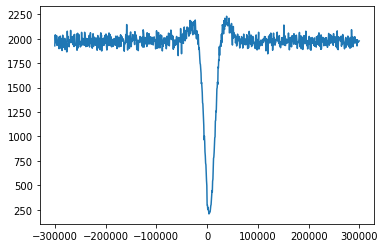

In [15]:
y, x = np.histogram(corr, bins=1000, range=(-300000, 300000))
plt.plot(x[:-1], y)

In [ ]:
corrs = []
for i in np.arange(0.01, 5, 0.1):
    corr, _ = correlation(data,
    corr_window=300000,
    start_chs=[1,2],
    stop_chs=[3,4],
    trig_ch=5)